In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
from astropy.io import fits
from astropy import table
from astLib import astWCS
import math
from nemo import completeness, MockSurvey

import sys
sys.path.append('../')
import nemo_mocks
import imp
imp.reload(nemo_mocks)

<module 'nemo_mocks' from '../nemo_mocks.py'>

In [2]:
h = 0.68

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=100.*h, ombh2=0.049*h**2, omch2=(0.31-0.049)*h**2, mnu=0.0, omk=0, tau=0.055)
pars.InitPower.set_params(As=0.81**2/0.8104862**2*2.022662e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=2.0)

#Linear spectra
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())
print(s8)

[0.81]


In [3]:
h = 0.68

params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 2.

}

path2data ='../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'\
'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14#*0.68
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'Qfit',
        'Qmode': 'downsample',
        'dwnsmpl_bins': 50,
        'save_dwsmpld': False,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 5e13*0.68,
            'Mmax': 1e16*0.68,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

[soliket.binnedclusterlikelihood] Number of redshift bins = 28.


Initializing clusters.py Binned Clusters
Running Q-fit completeness with downsampling selection function inputs.
Considering full map.
Total number of clusters in catalogue = 3169.
SNR cut = 5.0.
Number of clusters above the SNR cut = 3169.
The highest redshift = 1.9649999999999999
The lowest SNR = 5.000186060313553.
The highest SNR = 51.98994565380555.
Number of mass points for theory calculation 106.
Reading full Q function.
Number of tiles = 280.
Reading in full RMS table.
Number of tiles = 264. 
Number of sky patches = 40672.
Downsampling RMS and Q function using 50 bins.


dowsampled rms bin  0
areas of tiles in bin [1.37804228e-04 1.35708109e-04 1.39484767e-04 1.39166769e-04
 1.39709222e-04 1.40863925e-04 1.40114071e-04 1.36206561e-04
 1.38025979e-04 3.36132502e-06 1.35708109e-04 1.35708109e-04
 1.36206561e-04 1.39709222e-04 1.38425949e-04 1.38806231e-04
 1.40921151e-04 1.36206561e-04 1.40498990e-04 1.35708109e-04
 1.35708109e-04 1.39484767e-04 1.38425949e-04 1.36206561e-04
 1.39709222e-04 1.35708109e-04 1.40863925e-04 1.39709222e-04
 3.40231679e-06 1.35708109e-04 1.36206561e-04 3.32211124e-06
 3.40231679e-06 1.37585405e-04 4.98316685e-06 1.39709222e-04
 1.36685639e-04 1.40114071e-04 1.35708109e-04 1.40114071e-04
 1.35708109e-04 1.36206561e-04 3.36132502e-06 1.36206561e-04
 3.40231679e-06 1.36685639e-04 1.40114071e-04 3.40231679e-06
 1.40498990e-04 1.36685639e-04 1.36206561e-04 1.35708109e-04
 1.36685639e-04 1.36206561e-04 1.35708109e-04 1.40114071e-04
 3.36107511e-06 1.39709222e-04 1.35708109e-04 1.35708109e-04
 1.36206561e-04 1.40114071e-04 1.35190353

Number of downsampled sky patches = 50.
Number of Q functions = 50.
Entire survey area = 13631.324739140997 deg2.
2D likelihood as a function of redshift and signal-to-noise.
Number of SNR bins = 6.
Edges of SNR bins = [  3.98107171   7.07945784  12.58925412  22.38721139  39.81071706
  70.79457844 125.89254118].


dowsampled rms bin  34
areas of tiles in bin [1.27329567e-04 1.36183075e-04 1.35863583e-04 1.38388533e-04
 1.36183075e-04 1.42027999e-04 1.19095690e-04 1.34402148e-04
 1.34794930e-04 1.11277293e-04 1.06723959e-04 1.33114850e-04
 6.74917374e-06 6.31235055e-05 1.11700598e-04 1.35525697e-04
 1.27329567e-04 2.81489132e-06 1.41850307e-04 1.34794930e-04
 1.17370769e-06 1.12651087e-04 1.25808641e-04 1.35863583e-04
 1.35863583e-04 1.25808641e-04 1.26526902e-04 5.87423370e-06
 1.37557026e-04 1.36183075e-04 1.60575299e-06 1.27228034e-04
 1.35169464e-04 8.74467485e-05 1.37030768e-04 1.30994452e-04
 5.48702469e-05 1.34402148e-04 1.28460240e-04 1.35169464e-04
 4.97061890e-06 4.77518298e-07 1.15971255e-04 1.04631204e-04
 1.04826478e-04 1.35525697e-04 3.74782186e-05 1.08758919e-04
 1.26730258e-04 1.41732649e-04 5.27784382e-05 1.25695166e-04
 3.30550482e-06 3.24083405e-06 1.16776185e-04 1.34794930e-04
 1.39945718e-04 8.77366585e-06 3.29681619e-06 1.14506186e-04
 1.33114850e-04 1.37276278e-04 1.0938455

 Total predicted 2D N = 2891.5647958661993
Number of clusters in redshift bin 0: 19.080651650622908.
Number of clusters in redshift bin 1: 301.0184749550533.
Number of clusters in redshift bin 2: 431.49091931439415.
Number of clusters in redshift bin 3: 451.75045554763057.
Number of clusters in redshift bin 4: 408.366680319877.
Number of clusters in redshift bin 5: 340.25918684930286.
Number of clusters in redshift bin 6: 268.4911844486312.
Number of clusters in redshift bin 7: 202.5351948330557.
Number of clusters in redshift bin 8: 147.64418624624602.
Number of clusters in redshift bin 9: 104.69021293361534.
Number of clusters in redshift bin 10: 72.54158859272803.
Number of clusters in redshift bin 11: 49.3276587657529.
Number of clusters in redshift bin 12: 33.026116735952435.
Number of clusters in redshift bin 13: 21.822096927256634.
Number of clusters in redshift bin 14: 14.258001956567597.
Number of clusters in redshift bin 15: 9.227648856548212.
Number of clusters in redshift b

 ::: 2D ln likelihood =  327.99337926497645


array([-327.99337926])

In [4]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [5]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

 Total predicted 2D N = 2891.5647958661993
Number of clusters in redshift bin 0: 19.080651650622908.
Number of clusters in redshift bin 1: 301.0184749550533.
Number of clusters in redshift bin 2: 431.49091931439415.
Number of clusters in redshift bin 3: 451.75045554763057.
Number of clusters in redshift bin 4: 408.366680319877.
Number of clusters in redshift bin 5: 340.25918684930286.
Number of clusters in redshift bin 6: 268.4911844486312.
Number of clusters in redshift bin 7: 202.5351948330557.
Number of clusters in redshift bin 8: 147.64418624624602.
Number of clusters in redshift bin 9: 104.69021293361534.
Number of clusters in redshift bin 10: 72.54158859272803.
Number of clusters in redshift bin 11: 49.3276587657529.
Number of clusters in redshift bin 12: 33.026116735952435.
Number of clusters in redshift bin 13: 21.822096927256634.
Number of clusters in redshift bin 14: 14.258001956567597.
Number of clusters in redshift bin 15: 9.227648856548212.
Number of clusters in redshift b

In [6]:
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i, :].sum()    
    catNz[i] = catNzq[i, :].sum()

In [7]:
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']


zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)

In [12]:
mockconfig = {
    'predSNRCut': 5,
    'path2truthcat': '../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'fast',
    'QSource': 'fit'
}

In [13]:
# Make a 'true' mock - use the truth catalog, get true_SNR by looking up noise in the selFn dir
mode = 'without_Q'
truthTab = nemo_mocks.make_truth_mock(mode, mockconfig)

In [14]:
truth_cat, zarr, qarr = nemo_mocks.bin_catalog(truthTab[truthTab['true_SNR']>5], zbins, qbins, SNR_tag='true_SNR')

In [15]:
mockTab = nemo_mocks.make_nemo_mock(mockconfig)

In [16]:
mock_cat, zarr, qarr = nemo_mocks.bin_catalog(mockTab[mockTab['fixed_SNR']>5], zbins, qbins, SNR_tag='fixed_SNR')

In [17]:
Nq_truth = np.zeros(len(q))

for i in range(len(q)):
    Nq_truth[i] = truth_cat[:,i].sum()    

In [18]:
Nz_truth = np.zeros(len(z))

for i in range(len(z)):
    Nz_truth[i] = truth_cat[i,:].sum() 

In [19]:
Nq_mock = np.zeros(len(q))

for i in range(len(q)):
    Nq_mock[i] = mock_cat[:,i].sum()    

In [20]:
Nz_mock = np.zeros(len(z))

for i in range(len(z)):
    Nz_mock[i] = mock_cat[i,:].sum() 

In [21]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

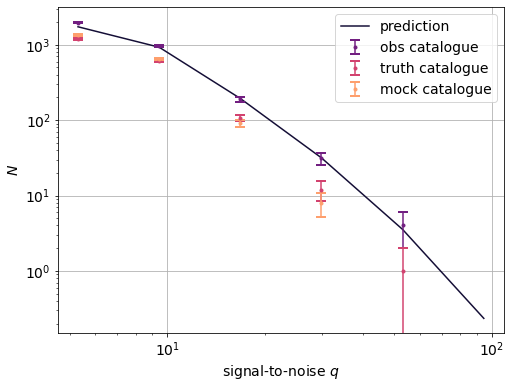

In [22]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], label='prediction')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(q, Nq_truth, yerr=np.sqrt(Nq_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(q, Nq_mock, yerr=np.sqrt(Nq_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [23]:
predNz = nemo_mocks.get_nemo_pred(mockconfig , zbins)

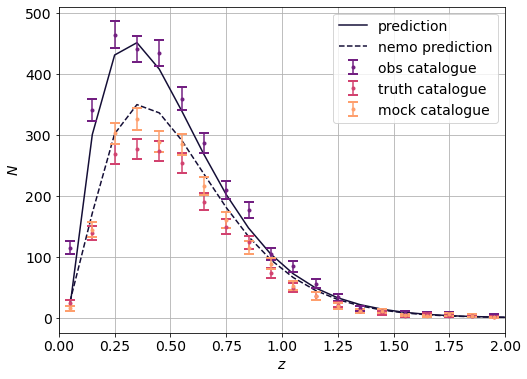

In [24]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], label='prediction')
plt.plot(z, predNz, color=color_list[0], linestyle='--', label='nemo prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(z, Nz_truth, yerr=np.sqrt(Nz_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(z, Nz_mock, yerr=np.sqrt(Nz_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xlim(0, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


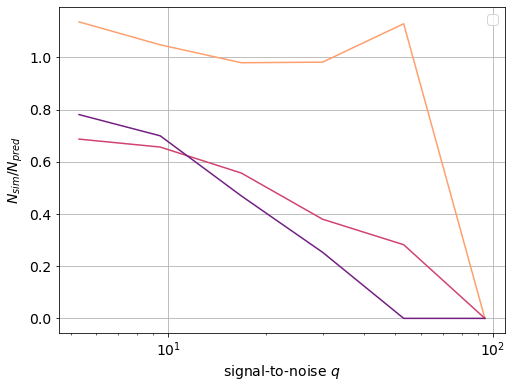

In [25]:
plt.figure(figsize=(8,6))
plt.semilogx(q, catNq/Nq, color=color_list[12])
plt.semilogx(q, Nq_truth/Nq, color=color_list[8])
plt.semilogx(q, Nq_mock/Nq, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


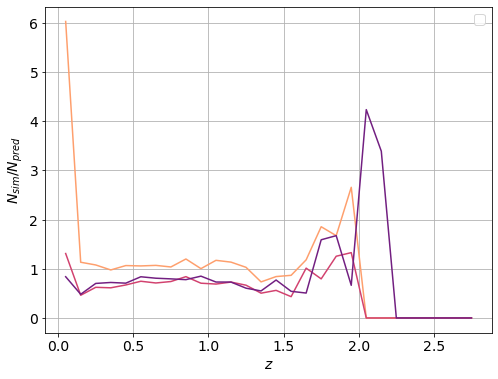

In [26]:
plt.figure(figsize=(8,6))
plt.plot(z, catNz/Nz, color=color_list[12])
plt.plot(z, Nz_truth/Nz, color=color_list[8])
plt.plot(z, Nz_mock/Nz, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [42]:
h = 0.68

params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 2.

}

path2data ='../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'\
'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14*0.68
    },
    'selfunc': {
        'SNRcut': 7.,
        'single_tile_test': "no",
        'mode': 'Qfit',
        'Qmode': 'downsample',
        'dwnsmpl_bins': 50,
        'save_dwsmpld': False,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 5e13*0.68,
            'Mmax': 1e16*0.68,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
Reading data catalog.
Reading data catal

 Nz for higher resolution =  249
0 33.706125667983315
1 887.9814791372355
2 187.7998427383542
3 31.61553810843096
4 3.827305708681894


Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clus

Number of clusters in redshift bin 23: 0.027550573335238852.
Number of clusters in redshift bin 23: 0.027550573335238852.
Number of clusters in redshift bin 23: 0.027550573335238852.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 26: 0.0046550231005464664.
Number of clusters in r

5 0.29590081798960904
 Total predicted 2D N =  1145.2261921786753
 ::: 2D ln likelihood =  175.5827587152357


array([-175.58275872])

In [43]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [44]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

0 33.706125667983315
1 887.9814791372355
2 187.7998427383542
3 31.61553810843096
4 3.827305708681894


Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 0: 31.020261656378576.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 1: 134.12326669897055.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clusters in redshift bin 2: 183.09612887969396.
Number of clus

Number of clusters in redshift bin 23: 0.027550573335238852.
Number of clusters in redshift bin 23: 0.027550573335238852.
Number of clusters in redshift bin 23: 0.027550573335238852.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 24: 0.015354367647925625.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 25: 0.008487968523740617.
Number of clusters in redshift bin 26: 0.0046550231005464664.
Number of clusters in r

5 0.29590081798960904
 Total predicted 2D N =  1145.2261921786753


In [45]:
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i, :].sum()    
    catNz[i] = catNzq[i, :].sum()

In [46]:
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']


zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)

In [47]:
mockconfig = {
    'predSNRCut': 7,
    'path2truthcat': '../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'fast',
    'QSource': 'fit'
}

In [48]:
# Make a 'true' mock - use the truth catalog, get true_SNR by looking up noise in the selFn dir
mode = 'without_Q'
truthTab = nemo_mocks.make_truth_mock(mode, mockconfig)

In [49]:
truth_cat, zarr, qarr = nemo_mocks.bin_catalog(truthTab[truthTab['true_SNR']>7], zbins, qbins, SNR_tag='true_SNR')

In [50]:
mockTab = nemo_mocks.make_nemo_mock(mockconfig)

In [51]:
mock_cat, zarr, qarr = nemo_mocks.bin_catalog(mockTab[mockTab['fixed_SNR']>7], zbins, qbins, SNR_tag='fixed_SNR')

In [52]:
Nq_truth = np.zeros(len(q))

for i in range(len(q)):
    Nq_truth[i] = truth_cat[:,i].sum()    

In [53]:
Nz_truth = np.zeros(len(z))

for i in range(len(z)):
    Nz_truth[i] = truth_cat[i,:].sum() 

In [54]:
Nq_mock = np.zeros(len(q))

for i in range(len(q)):
    Nq_mock[i] = mock_cat[:,i].sum()    

In [55]:
Nz_mock = np.zeros(len(z))

for i in range(len(z)):
    Nz_mock[i] = mock_cat[i,:].sum() 

In [56]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

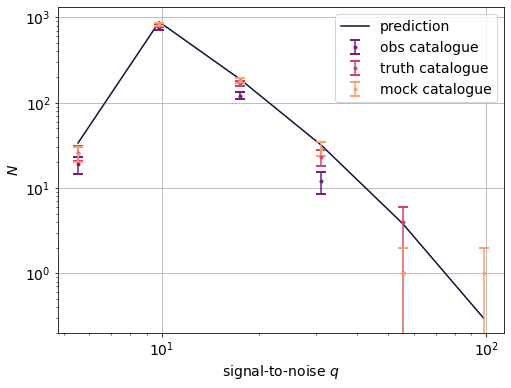

In [57]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], label='prediction')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(q, Nq_truth, yerr=np.sqrt(Nq_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(q, Nq_mock, yerr=np.sqrt(Nq_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [58]:
predNz = nemo_mocks.get_nemo_pred(mockconfig , zbins)

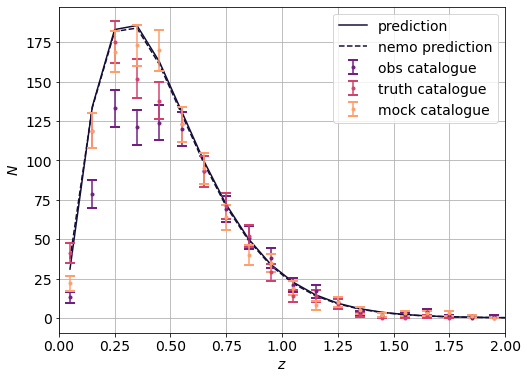

In [59]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], label='prediction')
plt.plot(z, predNz, color=color_list[0], linestyle='--', label='nemo prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(z, Nz_truth, yerr=np.sqrt(Nz_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(z, Nz_mock, yerr=np.sqrt(Nz_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xlim(0, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


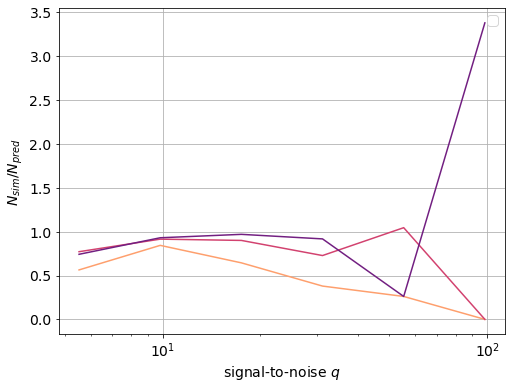

In [60]:
plt.figure(figsize=(8,6))
plt.semilogx(q, catNq/Nq, color=color_list[12])
plt.semilogx(q, Nq_truth/Nq, color=color_list[8])
plt.semilogx(q, Nq_mock/Nq, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


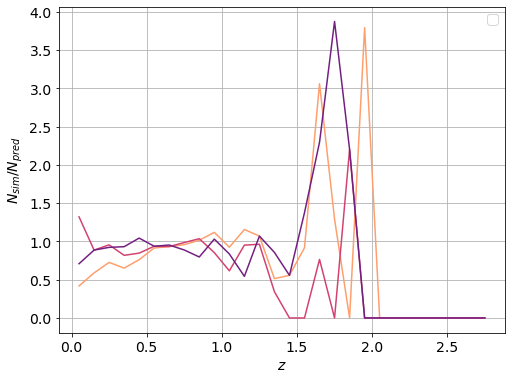

In [61]:
plt.figure(figsize=(8,6))
plt.plot(z, catNz/Nz, color=color_list[12])
plt.plot(z, Nz_truth/Nz, color=color_list[8])
plt.plot(z, Nz_mock/Nz, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()